In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
#loading Mnist dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

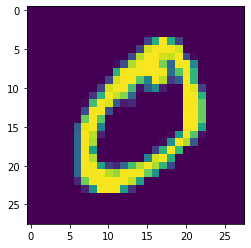

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [10]:
y_train[1]

0

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
x_train=x_train.reshape((60000,784))
x_test=x_test.reshape((10000,784))

In [14]:
x_train[1].shape

(784,)

In [15]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [16]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense 
model = Sequential()

In [18]:
model.add(InputLayer(input_shape=(784,)))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='sgd',loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs=10,batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.3997 - accuracy: 0.8843
Epoch 2/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.1671 - accuracy: 0.9504
Epoch 3/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.1193 - accuracy: 0.9647
Epoch 4/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0934 - accuracy: 0.9722
Epoch 5/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.0759 - accuracy: 0.9772
Epoch 6/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.0637 - accuracy: 0.9803
Epoch 7/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0536 - accuracy: 0.9833
Epoch 8/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.0462 - accuracy: 0.9856
Epoch 9/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0388 - accuracy: 0.9882
Epoch 10/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0

In [21]:
loss,accuracy=model.evaluate(x_test,y_test,batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.0812 - accuracy: 0.9756


In [22]:
y_predict = model.predict(x_test)
y_predict

array([[1.8660922e-08, 5.7892033e-09, 1.0039426e-05, ..., 9.9998546e-01,
        1.4902344e-07, 8.6785241e-07],
       [1.5060364e-06, 3.2333678e-04, 9.9954373e-01, ..., 6.6818234e-07,
        1.4694616e-05, 1.0455308e-11],
       [7.7583366e-08, 9.9895644e-01, 6.5522431e-06, ..., 4.4450318e-04,
        2.7496973e-04, 8.0030331e-06],
       ...,
       [5.7669981e-14, 2.2294942e-11, 4.0663368e-14, ..., 2.1924333e-09,
        1.2029938e-09, 3.2613096e-07],
       [1.6496365e-08, 2.9026654e-09, 2.4914125e-11, ..., 2.5011315e-10,
        1.3712877e-06, 8.2110166e-11],
       [1.3798297e-08, 2.2615471e-12, 2.9453506e-09, ..., 9.7323544e-14,
        1.3048170e-09, 1.7794960e-11]], dtype=float32)

In [23]:
import numpy as np
np.argmax(y_predict[1])

2

In [24]:
np.argmax(y_test[1])

2